In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.07,1,32,0,NaN
1,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,102.0,2,308,2025-03-29,2.36,4,334,7,NaN
2,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.64615,-73.75966,Entire home/apt,75.0,2,371,2025-02-16,3.05,2,6,28,NaN
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,96.0,2,331,2025-02-09,2.74,4,305,16,NaN
4,9005989,"Studio in The heart of Center SQ, in Albany NY",17766924,Sugey,NaN,SIXTH WARD,42.65559,-73.76506,Entire home/apt,88.0,1,617,2025-04-13,5.80,1,167,29,NaN


In [3]:
df.shape

(449, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              449 non-null    int64  
 1   name                            449 non-null    object 
 2   host_id                         449 non-null    int64  
 3   host_name                       449 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   449 non-null    object 
 6   latitude                        449 non-null    float64
 7   longitude                       449 non-null    float64
 8   room_type                       449 non-null    object 
 9   price                           413 non-null    float64
 10  minimum_nights                  449 non-null    int64  
 11  number_of_reviews               449 non-null    int64  
 12  last_review                     382 

In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending = False)

In [6]:
missing

neighbourhood_group    449
license                449
last_review             67
reviews_per_month       67
price                   36
dtype: int64

In [7]:
missing.dtypes

dtype('int64')

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [9]:
df = df[['id', 'name', 'host_id', 'host_name',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'availability_365']]

In [10]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_5733/2337335738.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
df['price']

0       70.0
1      102.0
2       75.0
3       96.0
4       88.0
       ...  
444     36.0
445     31.0
446    129.0
447     44.0
448     80.0
Name: price, Length: 449, dtype: float64

In [12]:
df = df.dropna()

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,32
1,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,SIXTH WARD,42.65222,-73.76724,Entire home/apt,102.0,2,308,334


## Room Type Distribution

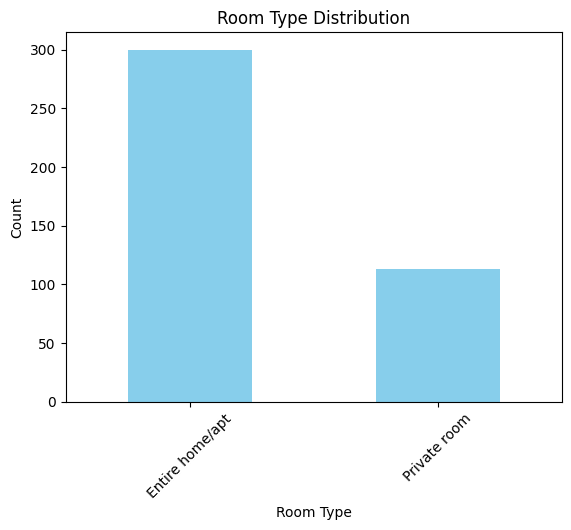

In [15]:
df['room_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

## Average Price by Room

In [16]:
df.groupby('room_type')['price'].mean().sort_values()

room_type
Private room        63.60177
Entire home/apt    133.17000
Name: price, dtype: float64

/tmp/ipykernel_5733/507208270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('room_type')['price'].mean().sort_values(), palette='Set2')


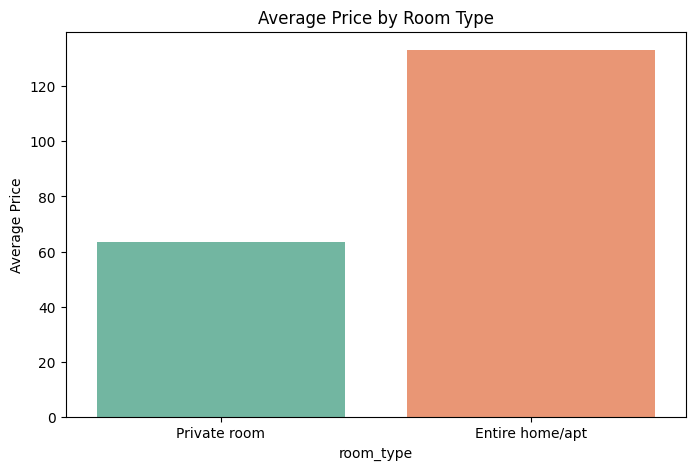

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df.groupby('room_type')['price'].mean().sort_values(), palette='Set2')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.show()

## Price Distribution (Capped at $500)

In [18]:
df_price = df[df['price'] > 500]['price']
df_price

26      582.0
130     882.0
133    1050.0
174     800.0
243    1200.0
Name: price, dtype: float64

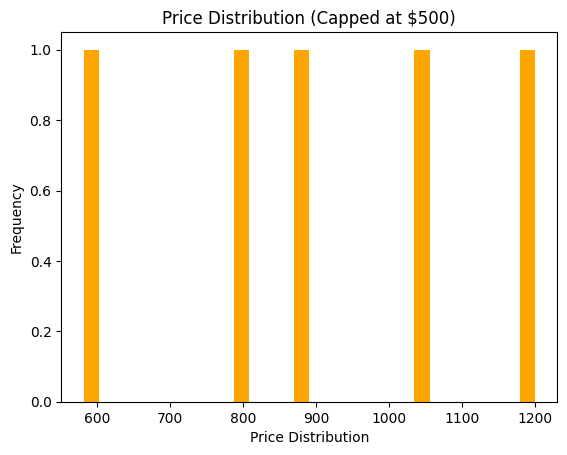

In [19]:
df_price.plot(kind='hist', bins=30, color = 'orange')
plt.xlabel('Price Distribution')
plt.ylabel('Frequency')
plt.title('Price Distribution (Capped at $500)')
plt.show()

## Top 10 Neighbourhoods by Number of Listings

In [20]:
df_neighbourhood = df['neighbourhood'].value_counts().head(10)
df_neighbourhood

neighbourhood
SIXTH WARD         86
TENTH WARD         46
SECOND WARD        45
THIRTEENTH WARD    42
THIRD WARD         35
NINTH WARD         34
FOURTEENTH WARD    25
ELEVENTH WARD      20
FIFTEENTH WARD     17
SEVENTH WARD       17
Name: count, dtype: int64

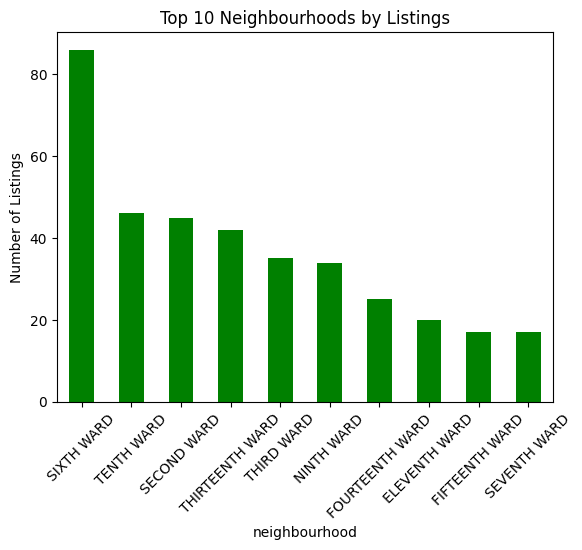

In [21]:
df_neighbourhood.plot(kind= 'bar', color='green')
plt.title('Top 10 Neighbourhoods by Listings')
plt.ylabel('Number of Listings')
plt.xticks(rotation = 45)
plt.show()

## Availability vs Price

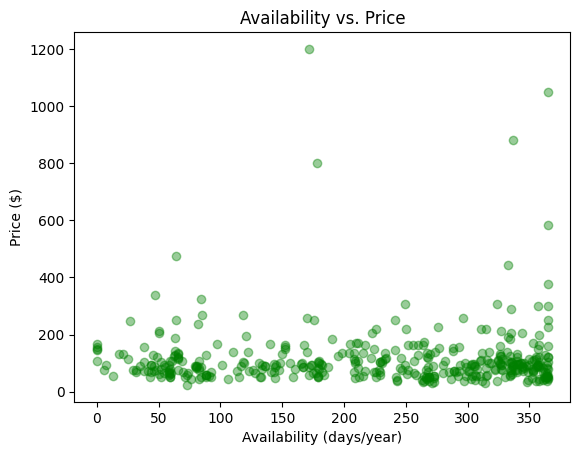

In [22]:
plt.scatter(df['availability_365'], df['price'],alpha= 0.4, color='green')
plt.xlabel('Availability (days/year)')
plt.ylabel('Price ($)')
plt.title('Availability vs. Price')
plt.show()

## Minimum Night Distribution (Capped at 30 Nights)

In [23]:
df_minimum_night = df[df['minimum_nights'] < 30]['minimum_nights']
df_minimum_night

0      28
1       2
2       2
3       2
4       1
       ..
408     2
409     5
410    28
411    28
412     3
Name: minimum_nights, Length: 388, dtype: int64

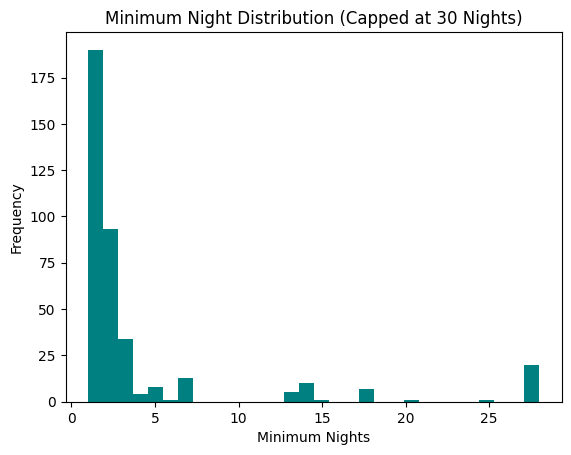

In [24]:
df_minimum_night.plot(kind= 'hist', bins=30, color = 'teal')
plt.title('Minimum Night Distribution (Capped at 30 Nights)')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()

## Number of Reviews Distribution (Capped at 100)

In [25]:
df_review = df[df['number_of_reviews'] < 100]['number_of_reviews']
df_review

0       9
9      61
10     28
12     53
14     48
       ..
408     0
409     0
410     0
411     0
412     0
Name: number_of_reviews, Length: 340, dtype: int64

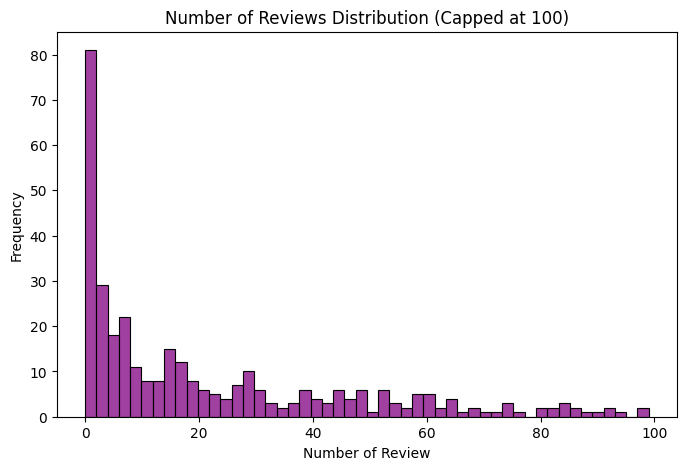

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df_review, color='purple', bins=50)
plt.title('Number of Reviews Distribution (Capped at 100)')
plt.xlabel('Number of Review')
plt.ylabel('Frequency')
plt.show()

## Correlaton Heatmap

In [27]:
correlation  = df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr() 
correlation

,price,minimum_nights,number_of_reviews,availability_365
price,1.000000,-0.143087,-0.068239,0.022760
minimum_nights,-0.143087,1.000000,-0.215462,0.069001
number_of_reviews,-0.068239,-0.215462,1.000000,-0.042318
availability_365,0.022760,0.069001,-0.042318,1.000000


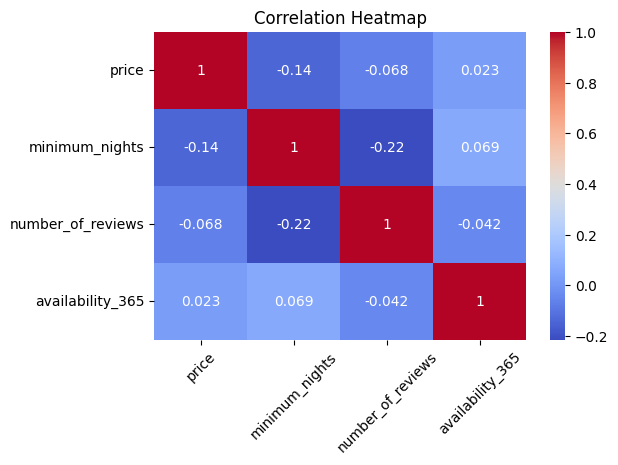

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

## Folium Map: Listing Locations and Prices

In [29]:
pip install folium


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import folium

In [31]:
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map_center

[np.float64(42.658458477660524), np.float64(-73.77768179477538)]

In [32]:
m = folium.Map(location=map_center, zoom_start=42)
m

In [33]:
filterd_df = df[df['price'] < 300].sample(min(300, len(df)))
filterd_df.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
217,937838302933205871,Hudson 1 at The Argus Hotel,526358730,Argus,ELEVENTH WARD,42.6606,-73.77284,Private room,165.0,1,7,264
47,32450400,Moroccan Sands,97330032,Sherrell,FOURTH WARD,42.6761,-73.73825,Private room,104.0,3,1,179


In [34]:
for _, row in filterd_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.5,
        popup=f"${row['price']} - {row['room_type']} ({row['neighbourhood']})"
    ).add_to(m)

In [35]:
m

In [36]:
df.to_csv("cleaned_airbnb_data.csv", index=False)

In [37]:
pd.read_csv(r'cleaned_airbnb_data.csv').head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,32
1,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,SIXTH WARD,42.65222,-73.76724,Entire home/apt,102.0,2,308,334
2,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,SECOND WARD,42.64615,-73.75966,Entire home/apt,75.0,2,371,6
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,SIXTH WARD,42.65222,-73.76724,Entire home/apt,96.0,2,331,305
4,9005989,"Studio in The heart of Center SQ, in Albany NY",17766924,Sugey,SIXTH WARD,42.65559,-73.76506,Entire home/apt,88.0,1,617,167
